<a href="https://colab.research.google.com/github/Sadhikaitham/Assignment/blob/main/Final_Project_18_07_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Preprocessing the data set of Amazon footwear products

import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from google.colab import files

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
url = "https://raw.githubusercontent.com/skul19/Final_Project/main/amazon_uk_shoes_products_dataset_2021_12.csv"
df = pd.read_csv(url)

# Ensure 'text' is the column containing the text data
text_column = 'review_text'

# Remove missing values
df.dropna(subset=[text_column], inplace=True)

# Lowercase text
df[text_column] = df[text_column].str.lower()

# Remove punctuation
def remove_punctuation(review_text):
    return review_text.translate(str.maketrans('', '', string.punctuation))

df[text_column] = df[text_column].apply(remove_punctuation)

# Tokenization
df[text_column] = df[text_column].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(review_text):
    return [word for word in review_text if word not in stop_words]

df[text_column] = df[text_column].apply(remove_stopwords)

# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(review_text):
    return [lemmatizer.lemmatize(word) for word in review_text]

df[text_column] = df[text_column].apply(lemmatize_text)

# Join tokens back into text
df[text_column] = df[text_column].apply(lambda x: ' '.join(x))

# Save the preprocessed dataset
df.to_csv("preprocessed_amazon_shoes_reviews.csv", index=False)

# Download the preprocessed dataset
files.download("preprocessed_amazon_shoes_reviews.csv")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 80.85%
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.40      0.50       218
           1       0.27      0.04      0.06       114
           2       0.83      0.98      0.90      1031

    accuracy                           0.81      1363
   macro avg       0.59      0.47      0.49      1363
weighted avg       0.76      0.81      0.77      1363



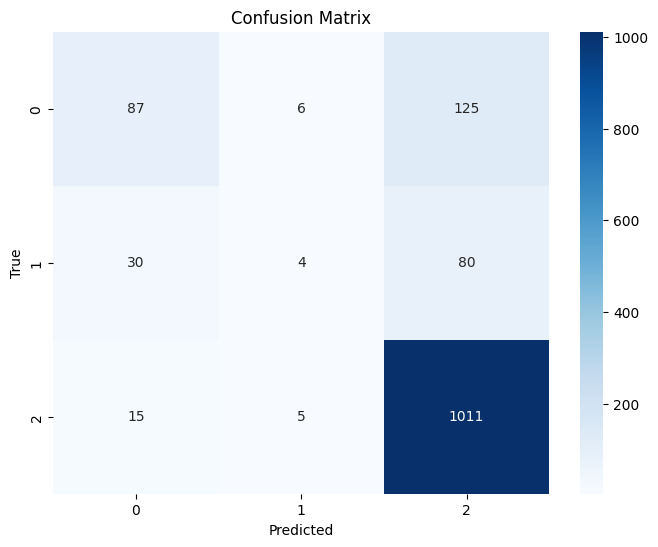

In [ ]:
#SVM

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
url = "https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_amazon_shoes_reviews.csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['review_rating'] >= 4, 2, np.where(df['review_rating'] <= 2, 0, 1))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['review_text', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['review_text'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Train an SVM classifier
classifier = SVC(kernel='linear', C=1.0, probability=True)
classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 80.12%
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.36      0.47       218
           1       0.36      0.11      0.16       114
           2       0.83      0.97      0.89      1031

    accuracy                           0.80      1363
   macro avg       0.61      0.48      0.51      1363
weighted avg       0.76      0.80      0.76      1363



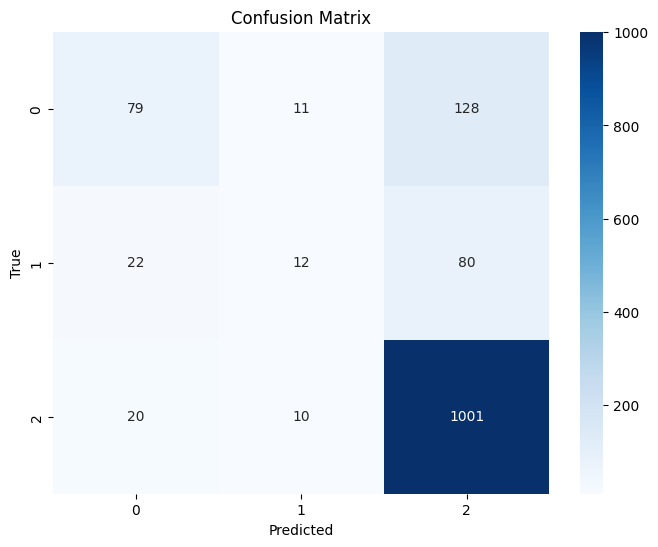

In [ ]:
#XGBOOST

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
url = "https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_amazon_shoes_reviews.csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['review_rating'] >= 4, 2, np.where(df['review_rating'] <= 2, 0, 1))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['review_text', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['review_text'], df['sentiment'], test_size=0.2, random_state=42
)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Train an XGBoost classifier
classifier = XGBClassifier(objective='multi:softmax', num_class=3)
classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


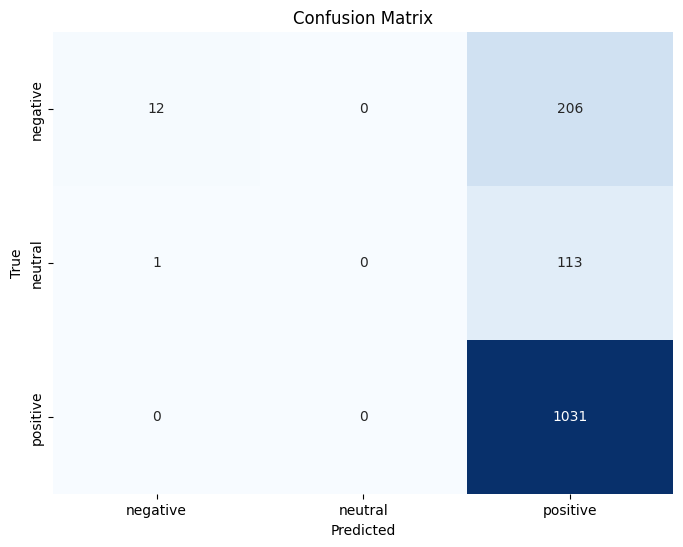

Accuracy: 76.52%
Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.06      0.10       218
     neutral       1.00      0.00      0.00       114
    positive       0.76      1.00      0.87      1031

    accuracy                           0.77      1363
   macro avg       0.90      0.35      0.32      1363
weighted avg       0.81      0.77      0.67      1363



In [ ]:
#Navie Bayes

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_amazon_shoes_reviews.csv"
df = pd.read_csv(url)
df['sentiment'] = np.where(df['review_rating'] >= 4, 'positive', np.where(df['review_rating'] <= 2, 'negative', 'neutral'))
# Handle missing values in 'review_text' column
df.dropna(subset=['review_text'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['review_text'], df['sentiment'], test_size=0.2, random_state=42
    )

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'], columns=['negative', 'neutral', 'positive'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions, zero_division=1)


print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


Epoch 1/5
171/171 [==============================] - 62s 338ms/step - loss: 0.6346 - accuracy: 0.7686
Epoch 2/5
171/171 [==============================] - 57s 333ms/step - loss: 0.4067 - accuracy: 0.8435
Epoch 3/5
171/171 [==============================] - 58s 338ms/step - loss: 0.2989 - accuracy: 0.8855
Epoch 4/5
171/171 [==============================] - 56s 330ms/step - loss: 0.2092 - accuracy: 0.9240
Epoch 5/5
43/43 [==============================] - 5s 113ms/step


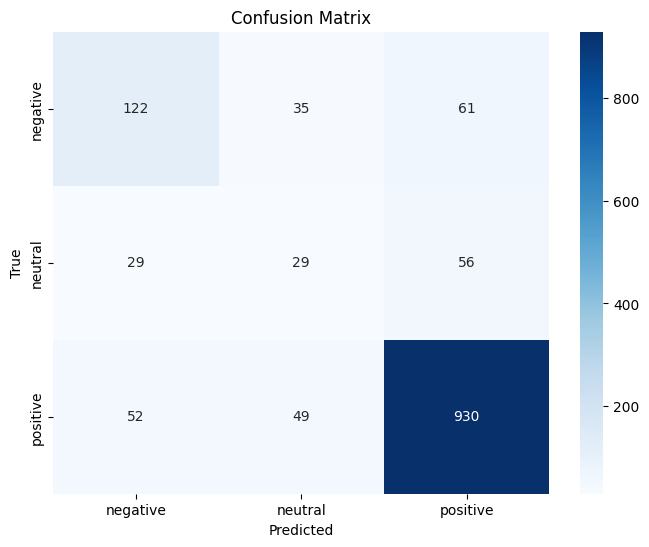

Accuracy: 79.31%
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.56      0.58       218
           1       0.26      0.25      0.26       114
           2       0.89      0.90      0.90      1031

    accuracy                           0.79      1363
   macro avg       0.58      0.57      0.58      1363
weighted avg       0.79      0.79      0.79      1363



In [ ]:
#LSTM

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_amazon_shoes_reviews.csv"
df = pd.read_csv(url)

df['sentiment'] = np.where(df['review_rating'] >= 4, 'positive', np.where(df['review_rating'] <= 2, 'negative', 'neutral'))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['review_text', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(train_data['review_text'].values)

# Convert text data to sequences
X_train = tokenizer.texts_to_sequences(train_data['review_text'].values)
X_test = tokenizer.texts_to_sequences(test_data['review_text'].values)

# Pad sequences to have a consistent length
max_len = max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Define the LSTM model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))  # 3 for positive, negative, neutral
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
y_train = pd.get_dummies(train_data['sentiment']).values
y_test = pd.get_dummies(test_data['sentiment']).values
model.fit(X_train, y_train, epochs=5, batch_size=32)
# Evaluate the model
predictions = model.predict(X_test)
y_pred = [pd.Series(pred).idxmax() for pred in predictions]
y_true = [pd.Series(true).idxmax() for true in y_test]
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap
class_labels = ['negative', 'neutral', 'positive']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


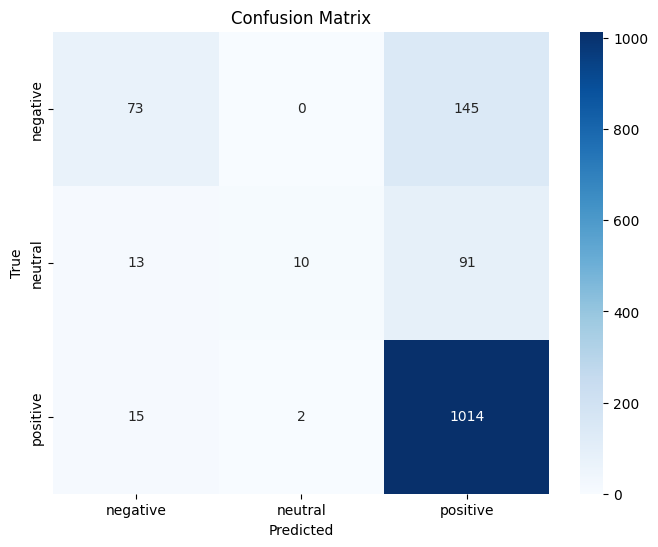

Accuracy on the test set: 80.48%
Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.33      0.46       218
     neutral       0.83      0.09      0.16       114
    positive       0.81      0.98      0.89      1031

    accuracy                           0.80      1363
   macro avg       0.79      0.47      0.50      1363
weighted avg       0.80      0.80      0.76      1363



In [ ]:
#Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_amazon_shoes_reviews.csv"

df = pd.read_csv(url)

# Create a fine-grained sentiment column
df['sentiment'] = np.where(df['review_rating'] >= 4, 'positive', np.where(df['review_rating'] <= 2, 'negative', 'neutral'))

# Handle missing values
df.dropna(subset=['review_text', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['review_text'])
X_test = vectorizer.transform(test_data['review_text'])

# Labels
y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ['negative', 'neutral', 'positive']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


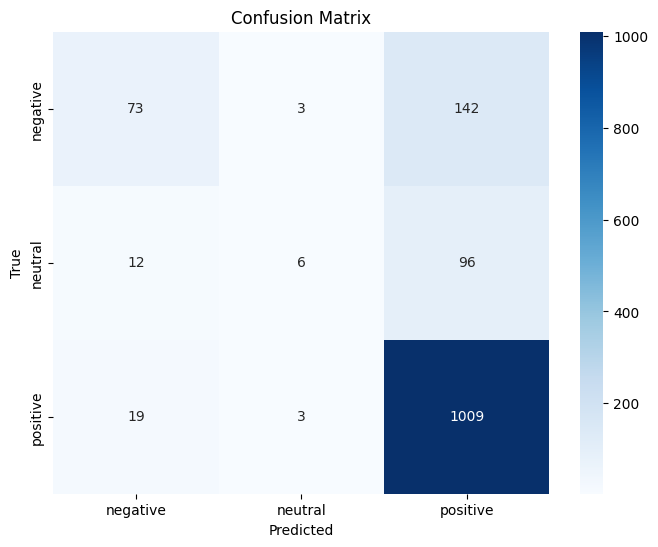

Accuracy on the test set: 79.82%
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.33      0.45       218
           1       0.50      0.05      0.10       114
           2       0.81      0.98      0.89      1031

    accuracy                           0.80      1363
   macro avg       0.67      0.46      0.48      1363
weighted avg       0.77      0.80      0.75      1363



In [ ]:
#CNN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_amazon_shoes_reviews.csv"

df = pd.read_csv(url)
# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['review_rating'] >= 4, 2, np.where(df['review_rating'] <= 2, 0, 1))
# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['review_text', 'sentiment'], inplace=True)
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
# Tokenization and Padding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['review_text'])
sequences = tokenizer.texts_to_sequences(train_data['review_text'])
X_train = pad_sequences(sequences, maxlen=max_len)
sequences = tokenizer.texts_to_sequences(test_data['review_text'])
X_test = pad_sequences(sequences, maxlen=max_len)
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(train_data['sentiment'].values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(test_data['sentiment'].values, dtype=torch.long)
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define CNN Model
class CNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_filters, filter_sizes, output_dim, dropout):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embed_dim))
            for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs]
        x = [F.max_pool1d(conv, conv.size(2)).squeeze(2) for conv in x]
        x = torch.cat(x, dim=1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
# Initialize the model
vocab_size = max_words
embed_dim = 100
num_filters = 100
filter_sizes = [3, 4, 5]
output_dim = 3  # Positive, Negative, Neutral
dropout = 0.5
model = CNNModel(vocab_size, embed_dim, num_filters, filter_sizes, output_dim, dropout)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

conf_matrix = confusion_matrix(all_labels, all_preds)
class_labels = ['negative', 'neutral', 'positive']
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
classification_rep = classification_report(all_labels, all_preds)

print(f"Accuracy on the test set: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


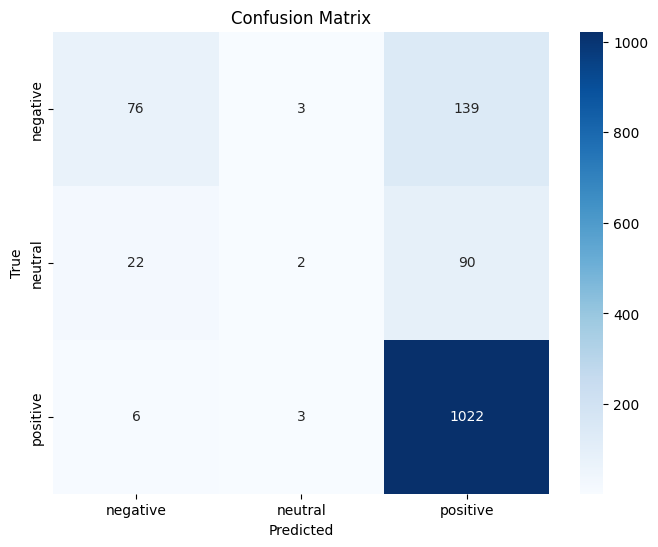

Accuracy: 80.70%
Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.35      0.47       218
     neutral       0.25      0.02      0.03       114
    positive       0.82      0.99      0.90      1031

    accuracy                           0.81      1363
   macro avg       0.60      0.45      0.47      1363
weighted avg       0.76      0.81      0.76      1363



In [ ]:
#Logistic

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_amazon_shoes_reviews.csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['review_rating'] >= 4, 'positive', np.where(df['review_rating'] <= 2, 'negative', 'neutral'))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['review_text', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data['review_text'])
test_vectors = tfidf_vectorizer.transform(test_data['review_text'])

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(train_vectors, train_data['sentiment'])

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_data['sentiment'], predictions)
classification_rep = classification_report(test_data['sentiment'], predictions, zero_division=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_data['sentiment'], predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print accuracy and classification report
print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


Accuracy: 81.80%
Classification Report:
               precision    recall  f1-score   support

    negative       0.68      0.43      0.52       218
     neutral       0.65      0.10      0.17       114
    positive       0.84      0.98      0.90      1031

    accuracy                           0.82      1363
   macro avg       0.72      0.50      0.53      1363
weighted avg       0.80      0.82      0.78      1363



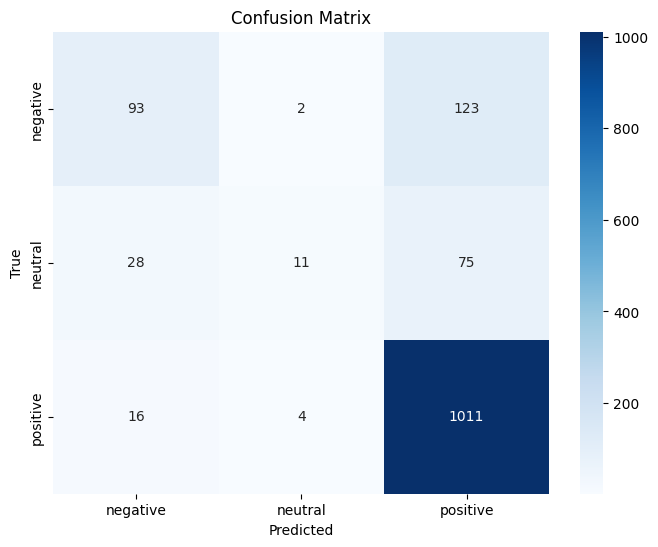

In [ ]:
#VOTING
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_amazon_shoes_reviews.csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['review_rating'] >= 4, 'positive', np.where(df['review_rating'] <= 2, 'negative', 'neutral'))

# Handle missing values in 'review_text' column
df.dropna(subset=['review_text'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['review_text'], df['sentiment'], test_size=0.2, random_state=42
)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Initialize individual classifiers
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('logreg', logreg_classifier),
        ('rf', rf_classifier),
        ('svm', svm_classifier)
    ],
    voting='soft'  # 'soft' for probability voting
)

# Train the Voting Classifier
voting_classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = voting_classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions, zero_division=1)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=voting_classifier.classes_,
            yticklabels=voting_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Preprocessing the dataset of Flipkart Review data


import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from google.colab import files

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/flipkart_review_data_2022_02.csv"
df = pd.read_csv(url)

# Ensure 'text' is the column containing the text data
text_column = 'reviewDescription'

# Remove missing values
df.dropna(subset=[text_column], inplace=True)

# Lowercase text
df[text_column] = df[text_column].str.lower()

# Remove punctuation
def remove_punctuation(review_text):
    return review_text.translate(str.maketrans('', '', string.punctuation))

df[text_column] = df[text_column].apply(remove_punctuation)

# Tokenization
df[text_column] = df[text_column].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(review_text):
    return [word for word in review_text if word not in stop_words]

df[text_column] = df[text_column].apply(remove_stopwords)

# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(review_text):
    return [lemmatizer.lemmatize(word) for word in review_text]

df[text_column] = df[text_column].apply(lemmatize_text)

# Join tokens back into text
df[text_column] = df[text_column].apply(lambda x: ' '.join(x))

# Save the preprocessed dataset
df.to_csv("preprocessed_flipkart_review.csv", index=False)

# Download the preprocessed dataset
files.download("preprocessed_flipkart_review.csv")




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 82.61%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         2
           2       0.83      1.00      0.90        57

    accuracy                           0.83        69
   macro avg       0.28      0.33      0.30        69
weighted avg       0.68      0.83      0.75        69



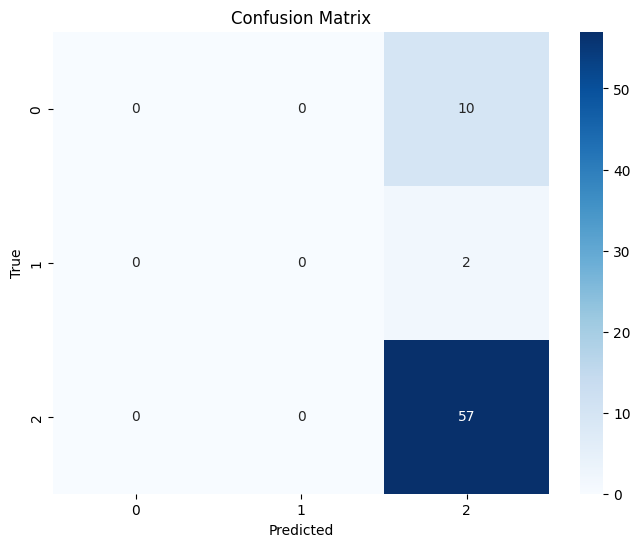

In [ ]:
#SVM
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
url = "https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_flipkart_review%20(1).csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['averageRating'] >= 4, 2, np.where(df['averageRating'] <= 2, 0, 1))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['reviewDescription', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['reviewDescription'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Train an SVM classifier
classifier = SVC(kernel='linear', C=1.0, probability=True)
classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions,zero_division=0)
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 72.46%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         2
           2       0.81      0.88      0.84        57

    accuracy                           0.72        69
   macro avg       0.27      0.29      0.28        69
weighted avg       0.67      0.72      0.69        69



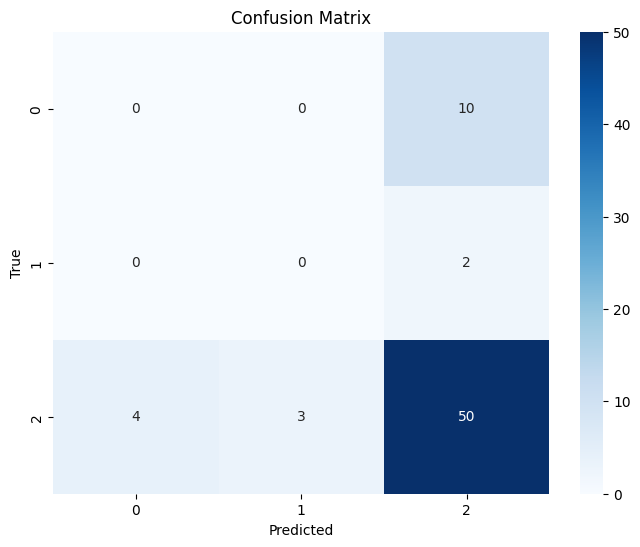

In [ ]:
#XGBOOST

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_flipkart_review%20(1).csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['averageRating'] >= 4, 2, np.where(df['averageRating'] <= 2, 0, 1))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['reviewDescription', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['reviewDescription'], df['sentiment'], test_size=0.2, random_state=42
)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Train an XGBoost classifier
classifier = XGBClassifier(objective='multi:softmax', num_class=3)
classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


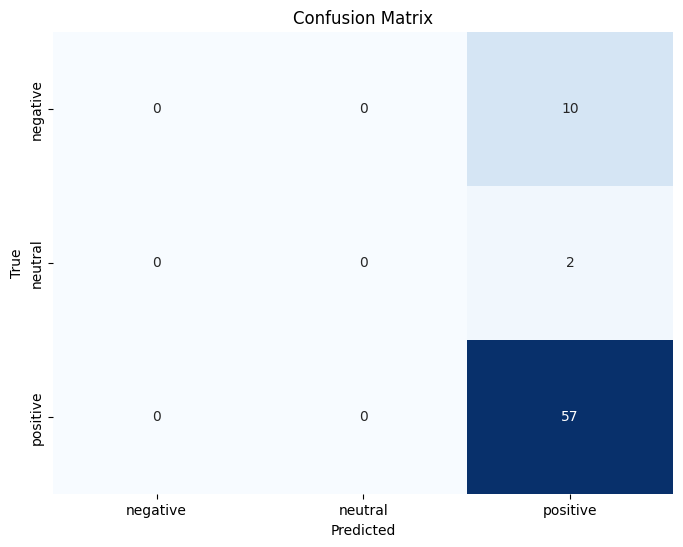

Accuracy: 82.61%
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.00      0.00        10
     neutral       1.00      0.00      0.00         2
    positive       0.83      1.00      0.90        57

    accuracy                           0.83        69
   macro avg       0.94      0.33      0.30        69
weighted avg       0.86      0.83      0.75        69



In [ ]:
#Navie Bayes

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_flipkart_review%20(1).csv"
df = pd.read_csv(url)
df['sentiment'] = np.where(df['averageRating'] >= 4, 'positive', np.where(df['averageRating'] <= 2, 'negative', 'neutral'))
# Handle missing values in 'reviewDescription' column
df.dropna(subset=['reviewDescription'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['reviewDescription'], df['sentiment'], test_size=0.2, random_state=42
    )

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'], columns=['negative', 'neutral', 'positive'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions, zero_division=1)


print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


Epoch 1/5
9/9 [==============================] - 6s 101ms/step - loss: 0.9569 - accuracy: 0.7117
Epoch 2/5
9/9 [==============================] - 1s 106ms/step - loss: 0.7497 - accuracy: 0.7664
Epoch 3/5
9/9 [==============================] - 1s 111ms/step - loss: 0.7059 - accuracy: 0.7664
Epoch 4/5
9/9 [==============================] - 1s 118ms/step - loss: 0.6932 - accuracy: 0.7664
Epoch 5/5
3/3 [==============================] - 0s 15ms/step


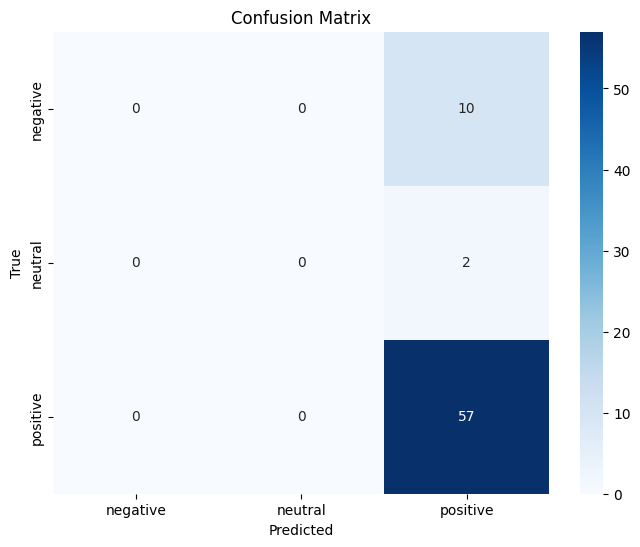

Accuracy: 82.61%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         2
           2       0.83      1.00      0.90        57

    accuracy                           0.83        69
   macro avg       0.28      0.33      0.30        69
weighted avg       0.68      0.83      0.75        69



In [ ]:
#LSTM

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_flipkart_review%20(1).csv"
df = pd.read_csv(url)

df['sentiment'] = np.where(df['averageRating'] >= 4, 'positive', np.where(df['averageRating'] <= 2, 'negative', 'neutral'))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['reviewDescription', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(train_data['reviewDescription'].values)

# Convert text data to sequences
X_train = tokenizer.texts_to_sequences(train_data['reviewDescription'].values)
X_test = tokenizer.texts_to_sequences(test_data['reviewDescription'].values)

# Pad sequences to have a consistent length
max_len = max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Define the LSTM model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))  # 3 for positive, negative, neutral
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
y_train = pd.get_dummies(train_data['sentiment']).values
y_test = pd.get_dummies(test_data['sentiment']).values
model.fit(X_train, y_train, epochs=5, batch_size=32)
# Evaluate the model
predictions = model.predict(X_test)
y_pred = [pd.Series(pred).idxmax() for pred in predictions]
y_true = [pd.Series(true).idxmax() for true in y_test]
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap
class_labels = ['negative', 'neutral', 'positive']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred,zero_division=0)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


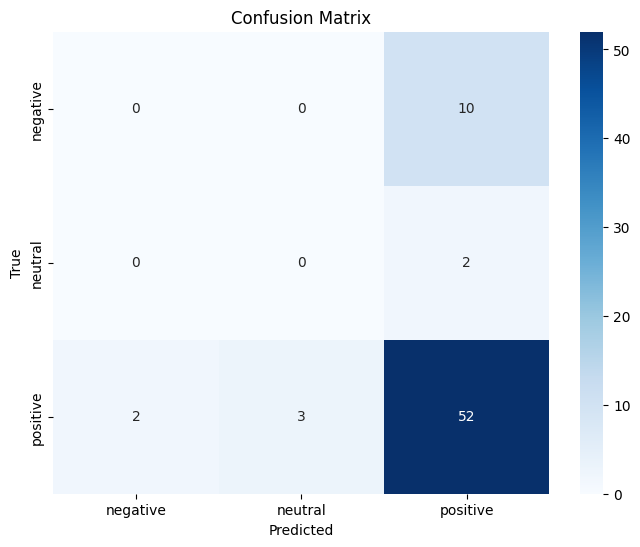

Accuracy on the test set: 75.36%
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        10
     neutral       0.00      0.00      0.00         2
    positive       0.81      0.91      0.86        57

    accuracy                           0.75        69
   macro avg       0.27      0.30      0.29        69
weighted avg       0.67      0.75      0.71        69



In [ ]:
#Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_flipkart_review%20(1).csv"
df = pd.read_csv(url)

# Create a fine-grained sentiment column
df['sentiment'] = np.where(df['averageRating'] >= 4, 'positive', np.where(df['averageRating'] <= 2, 'negative', 'neutral'))

# Handle missing values
df.dropna(subset=['reviewDescription', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['reviewDescription'])
X_test = vectorizer.transform(test_data['reviewDescription'])

# Labels
y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ['negative', 'neutral', 'positive']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=0)

print(f"Accuracy on the test set: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


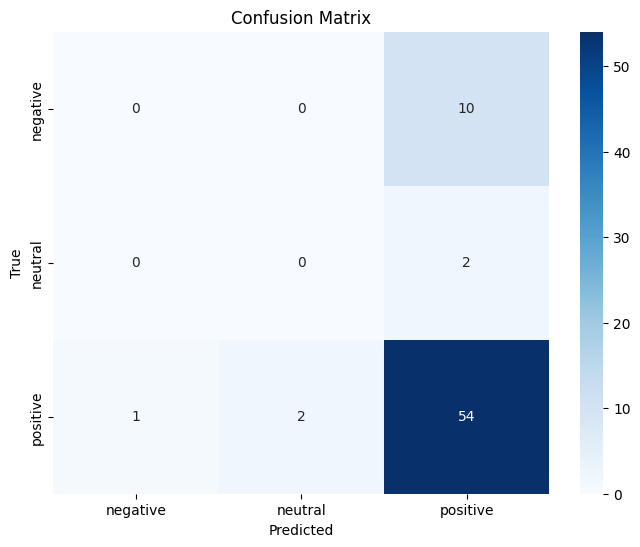

Accuracy on the test set: 78.26%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         2
           2       0.82      0.95      0.88        57

    accuracy                           0.78        69
   macro avg       0.27      0.32      0.29        69
weighted avg       0.68      0.78      0.73        69



In [ ]:
#CNN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_flipkart_review%20(1).csv"
df = pd.read_csv(url)
# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['averageRating'] >= 4, 2, np.where(df['averageRating'] <= 2, 0, 1))
# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['averageRating', 'sentiment'], inplace=True)
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
# Tokenization and Padding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['reviewDescription'])
sequences = tokenizer.texts_to_sequences(train_data['reviewDescription'])
X_train = pad_sequences(sequences, maxlen=max_len)
sequences = tokenizer.texts_to_sequences(test_data['reviewDescription'])
X_test = pad_sequences(sequences, maxlen=max_len)
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(train_data['sentiment'].values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(test_data['sentiment'].values, dtype=torch.long)
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define CNN Model
class CNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_filters, filter_sizes, output_dim, dropout):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embed_dim))
            for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs]
        x = [F.max_pool1d(conv, conv.size(2)).squeeze(2) for conv in x]
        x = torch.cat(x, dim=1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
# Initialize the model
vocab_size = max_words
embed_dim = 100
num_filters = 100
filter_sizes = [3, 4, 5]
output_dim = 3  # Positive, Negative, Neutral
dropout = 0.5
model = CNNModel(vocab_size, embed_dim, num_filters, filter_sizes, output_dim, dropout)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

conf_matrix = confusion_matrix(all_labels, all_preds)
class_labels = ['negative', 'neutral', 'positive']
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
classification_rep = classification_report(all_labels, all_preds)

print(f"Accuracy on the test set: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


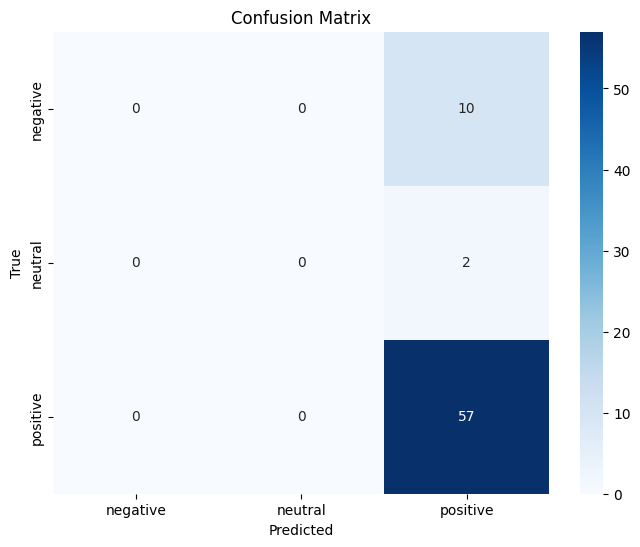

Accuracy: 82.61%
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.00      0.00        10
     neutral       1.00      0.00      0.00         2
    positive       0.83      1.00      0.90        57

    accuracy                           0.83        69
   macro avg       0.94      0.33      0.30        69
weighted avg       0.86      0.83      0.75        69



In [ ]:
#Logistic

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_flipkart_review%20(1).csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['averageRating'] >= 4, 'positive', np.where(df['averageRating'] <= 2, 'negative', 'neutral'))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['reviewDescription', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data['reviewDescription'])
test_vectors = tfidf_vectorizer.transform(test_data['reviewDescription'])

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(train_vectors, train_data['sentiment'])

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_data['sentiment'], predictions)
classification_rep = classification_report(test_data['sentiment'], predictions, zero_division=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_data['sentiment'], predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print accuracy and classification report
print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


Accuracy: 82.61%
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.00      0.00        10
     neutral       1.00      0.00      0.00         2
    positive       0.83      1.00      0.90        57

    accuracy                           0.83        69
   macro avg       0.94      0.33      0.30        69
weighted avg       0.86      0.83      0.75        69



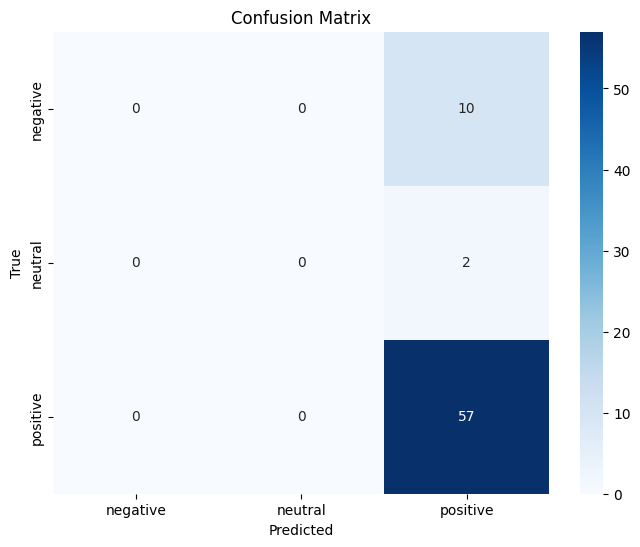

In [ ]:

 #VOTING
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_flipkart_review%20(1).csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['averageRating'] >= 4, 'positive', np.where(df['averageRating'] <= 2, 'negative', 'neutral'))

# Handle missing values in 'review_text' column
df.dropna(subset=['reviewDescription'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['reviewDescription'], df['sentiment'], test_size=0.2, random_state=42
)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Initialize individual classifiers
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('logreg', logreg_classifier),
        ('rf', rf_classifier),
        ('svm', svm_classifier)
    ],
    voting='soft'  # 'soft' for probability voting
)

# Train the Voting Classifier
voting_classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = voting_classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions, zero_division=1)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=voting_classifier.classes_,
            yticklabels=voting_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Preprocessing the data set of Grammar & products Review

import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from google.colab import files

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/GrammarandProductReviews.csv"
df = pd.read_csv(url)

# Ensure 'text' is the column containing the text data
text_column = 'reviews_text'

# Remove missing values
df.dropna(subset=[text_column], inplace=True)

# Lowercase text
df[text_column] = df[text_column].str.lower()

# Remove punctuation
def remove_punctuation(reviews_text):
    return reviews_text.translate(str.maketrans('', '', string.punctuation))

df[text_column] = df[text_column].apply(remove_punctuation)

# Tokenization
df[text_column] = df[text_column].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(reviews_text):
    return [word for word in reviews_text if word not in stop_words]

df[text_column] = df[text_column].apply(remove_stopwords)

# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(reviews_text):
    return [lemmatizer.lemmatize(word) for word in reviews_text]

df[text_column] = df[text_column].apply(lemmatize_text)

# Join tokens back into text
df[text_column] = df[text_column].apply(lambda x: ' '.join(x))

# Save the preprocessed dataset
df.to_csv("preprocessed_grammar_products_reviews.csv", index=False)

# Download the preprocessed dataset
files.download("preprocessed_grammar_products_reviews.csv")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-6-13a7b6fc05c7>:20: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 90.86%
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.53      0.62        36
           1       1.00      0.08      0.14        13
           2       0.92      0.99      0.95       312

    accuracy                           0.91       361
   macro avg       0.89      0.53      0.57       361
weighted avg       0.91      0.91      0.89       361



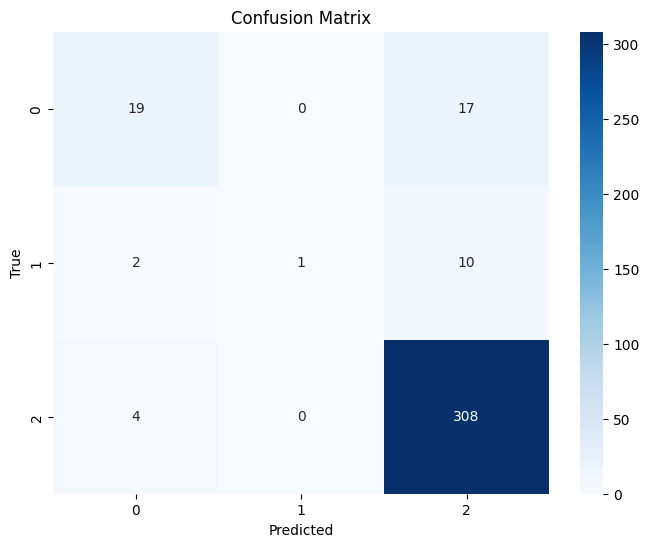

In [ ]:
#SVM
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_grammar_products_reviews.csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['reviews_rating'] >= 4, 2, np.where(df['reviews_rating'] <= 2, 0, 1))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['reviews_text', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['reviews_text'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Train an SVM classifier
classifier = SVC(kernel='linear', C=1.0, probability=True)
classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions,zero_division=0)
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 89.75%
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.47      0.56        36
           1       1.00      0.08      0.14        13
           2       0.91      0.98      0.95       312

    accuracy                           0.90       361
   macro avg       0.86      0.51      0.55       361
weighted avg       0.89      0.90      0.88       361



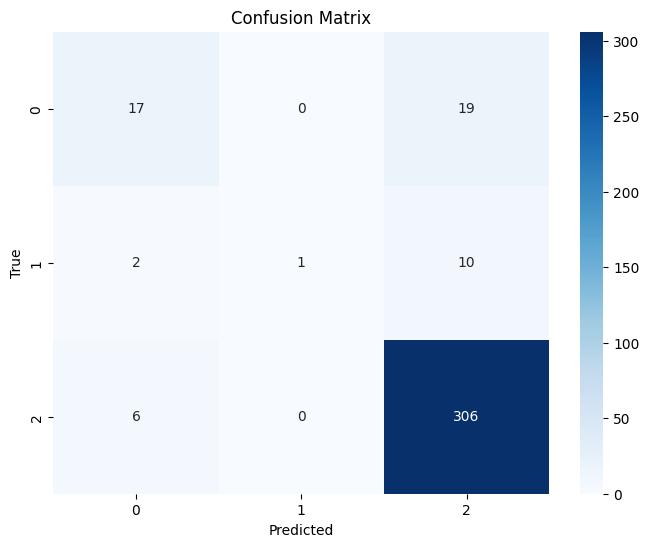

In [ ]:
#XGBOOST

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_grammar_products_reviews.csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['reviews_rating'] >= 4, 2, np.where(df['reviews_rating'] <= 2, 0, 1))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['reviews_text', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['reviews_text'], df['sentiment'], test_size=0.2, random_state=42
)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Train an XGBoost classifier
classifier = XGBClassifier(objective='multi:softmax', num_class=3)
classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


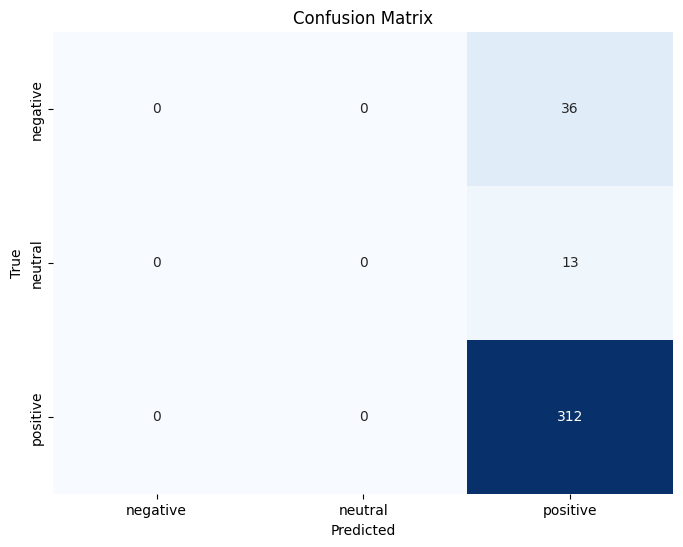

Accuracy: 86.43%
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.00      0.00        36
     neutral       1.00      0.00      0.00        13
    positive       0.86      1.00      0.93       312

    accuracy                           0.86       361
   macro avg       0.95      0.33      0.31       361
weighted avg       0.88      0.86      0.80       361



In [ ]:
#Navie Bayes

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_grammar_products_reviews.csv"
df = pd.read_csv(url)
df['sentiment'] = np.where(df['reviews_rating'] >= 4, 'positive', np.where(df['reviews_rating'] <= 2, 'negative', 'neutral'))
# Handle missing values in 'reviewDescription' column
df.dropna(subset=['reviews_text'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['reviews_text'], df['sentiment'], test_size=0.2, random_state=42
    )

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'], columns=['negative', 'neutral', 'positive'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions, zero_division=1)


print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


Epoch 1/5
46/46 [==============================] - 9s 133ms/step - loss: 0.6029 - accuracy: 0.8473
Epoch 2/5
46/46 [==============================] - 6s 134ms/step - loss: 0.4394 - accuracy: 0.8612
Epoch 3/5
46/46 [==============================] - 5s 117ms/step - loss: 0.2907 - accuracy: 0.8987
Epoch 4/5
46/46 [==============================] - 7s 151ms/step - loss: 0.1788 - accuracy: 0.9417
Epoch 5/5
12/12 [==============================] - 1s 32ms/step


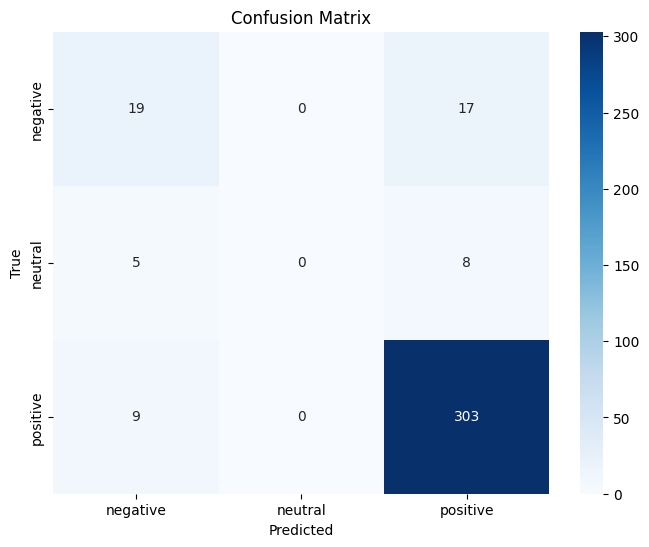

Accuracy: 89.20%
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.53      0.55        36
           1       0.00      0.00      0.00        13
           2       0.92      0.97      0.95       312

    accuracy                           0.89       361
   macro avg       0.50      0.50      0.50       361
weighted avg       0.86      0.89      0.87       361



In [ ]:
#LSTM

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_grammar_products_reviews.csv"
df = pd.read_csv(url)

df['sentiment'] = np.where(df['reviews_rating'] >= 4, 'positive', np.where(df['reviews_rating'] <= 2, 'negative', 'neutral'))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['reviews_text', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(train_data['reviews_text'].values)

# Convert text data to sequences
X_train = tokenizer.texts_to_sequences(train_data['reviews_text'].values)
X_test = tokenizer.texts_to_sequences(test_data['reviews_text'].values)

# Pad sequences to have a consistent length
max_len = max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Define the LSTM model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))  # 3 for positive, negative, neutral
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
y_train = pd.get_dummies(train_data['sentiment']).values
y_test = pd.get_dummies(test_data['sentiment']).values
model.fit(X_train, y_train, epochs=5, batch_size=32)
# Evaluate the model
predictions = model.predict(X_test)
y_pred = [pd.Series(pred).idxmax() for pred in predictions]
y_true = [pd.Series(true).idxmax() for true in y_test]
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap
class_labels = ['negative', 'neutral', 'positive']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred,zero_division=0)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


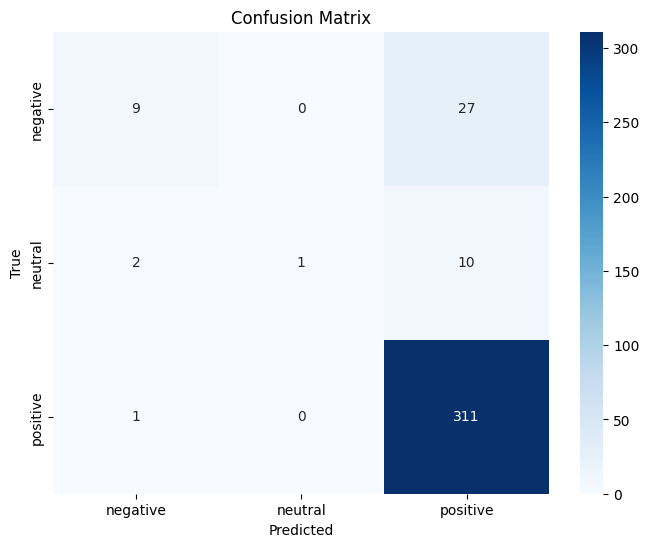

Accuracy on the test set: 88.92%
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.25      0.38        36
     neutral       1.00      0.08      0.14        13
    positive       0.89      1.00      0.94       312

    accuracy                           0.89       361
   macro avg       0.88      0.44      0.49       361
weighted avg       0.88      0.89      0.86       361



In [ ]:
#Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_grammar_products_reviews.csv"
df = pd.read_csv(url)

# Create a fine-grained sentiment column
df['sentiment'] = np.where(df['reviews_rating'] >= 4, 'positive', np.where(df['reviews_rating'] <= 2, 'negative', 'neutral'))

# Handle missing values
df.dropna(subset=['reviews_text', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['reviews_text'])
X_test = vectorizer.transform(test_data['reviews_text'])

# Labels
y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ['negative', 'neutral', 'positive']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=0)

print(f"Accuracy on the test set: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


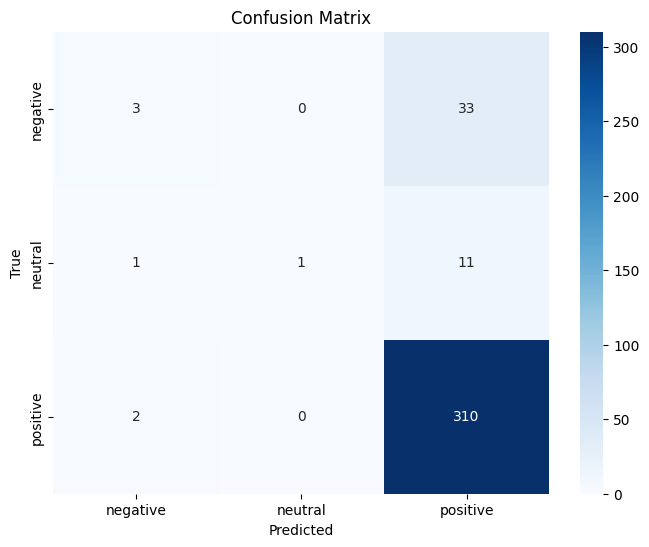

Accuracy on the test set: 86.98%
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.08      0.14        36
           1       1.00      0.08      0.14        13
           2       0.88      0.99      0.93       312

    accuracy                           0.87       361
   macro avg       0.79      0.38      0.41       361
weighted avg       0.84      0.87      0.82       361



In [ ]:
#CNN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_grammar_products_reviews.csv"
df = pd.read_csv(url)
# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['reviews_rating'] >= 4, 2, np.where(df['reviews_rating'] <= 2, 0, 1))
# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['reviews_rating', 'sentiment'], inplace=True)
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
# Tokenization and Padding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['reviews_text'])
sequences = tokenizer.texts_to_sequences(train_data['reviews_text'])
X_train = pad_sequences(sequences, maxlen=max_len)
sequences = tokenizer.texts_to_sequences(test_data['reviews_text'])
X_test = pad_sequences(sequences, maxlen=max_len)
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(train_data['sentiment'].values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(test_data['sentiment'].values, dtype=torch.long)
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define CNN Model
class CNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_filters, filter_sizes, output_dim, dropout):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embed_dim))
            for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs]
        x = [F.max_pool1d(conv, conv.size(2)).squeeze(2) for conv in x]
        x = torch.cat(x, dim=1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
# Initialize the model
vocab_size = max_words
embed_dim = 100
num_filters = 100
filter_sizes = [3, 4, 5]
output_dim = 3  # Positive, Negative, Neutral
dropout = 0.5
model = CNNModel(vocab_size, embed_dim, num_filters, filter_sizes, output_dim, dropout)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

conf_matrix = confusion_matrix(all_labels, all_preds)
class_labels = ['negative', 'neutral', 'positive']
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
classification_rep = classification_report(all_labels, all_preds)

print(f"Accuracy on the test set: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


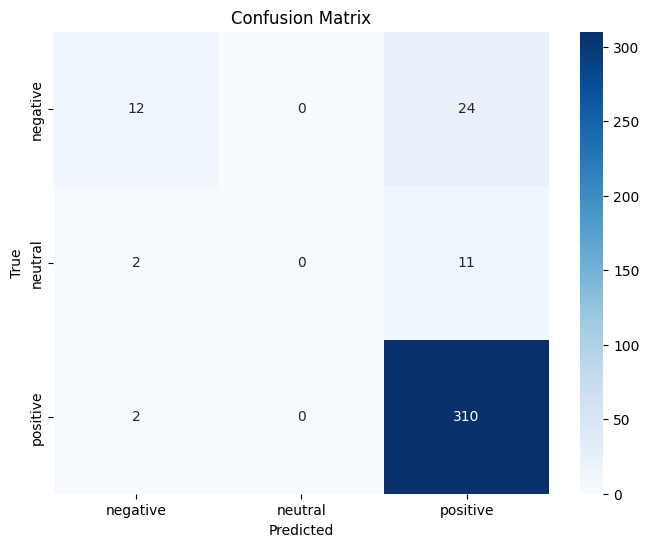

Accuracy: 89.20%
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.33      0.46        36
     neutral       1.00      0.00      0.00        13
    positive       0.90      0.99      0.94       312

    accuracy                           0.89       361
   macro avg       0.88      0.44      0.47       361
weighted avg       0.89      0.89      0.86       361



In [ ]:
#Logistic

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_grammar_products_reviews.csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['reviews_rating'] >= 4, 'positive', np.where(df['reviews_rating'] <= 2, 'negative', 'neutral'))

# Handle missing values in 'review_text' and 'sentiment' columns
df.dropna(subset=['reviews_text', 'sentiment'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data['reviews_text'])
test_vectors = tfidf_vectorizer.transform(test_data['reviews_text'])

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(train_vectors, train_data['sentiment'])

# Predict sentiment on the test set
predictions = classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_data['sentiment'], predictions)
classification_rep = classification_report(test_data['sentiment'], predictions, zero_division=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_data['sentiment'], predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print accuracy and classification report
print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)


Accuracy: 90.58%
Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.53      0.60        36
     neutral       1.00      0.08      0.14        13
    positive       0.92      0.98      0.95       312

    accuracy                           0.91       361
   macro avg       0.88      0.53      0.57       361
weighted avg       0.90      0.91      0.89       361



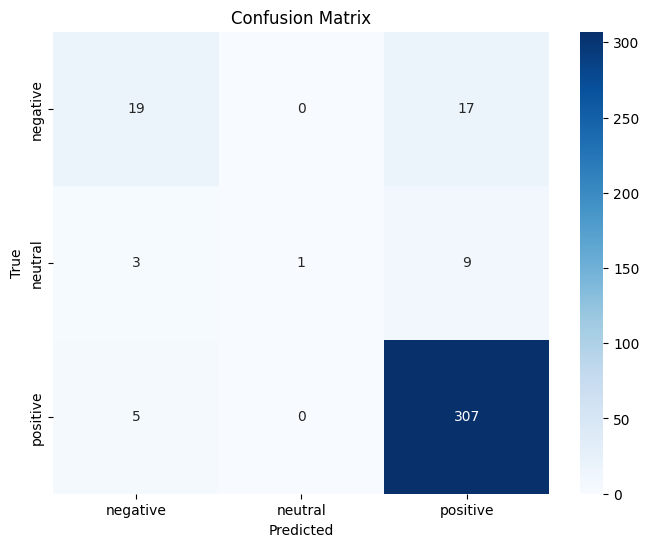

In [ ]:
#VOTING
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
url="https://raw.githubusercontent.com/skul19/Final_Project/main/preprocessed_grammar_products_reviews.csv"
df = pd.read_csv(url)

# Map sentiment labels to numerical values
df['sentiment'] = np.where(df['reviews_rating'] >= 4, 'positive', np.where(df['reviews_rating'] <= 2, 'negative', 'neutral'))

# Handle missing values in 'review_text' column
df.dropna(subset=['reviews_text'], inplace=True)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['reviews_text'], df['sentiment'], test_size=0.2, random_state=42
)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Initialize individual classifiers
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('logreg', logreg_classifier),
        ('rf', rf_classifier),
        ('svm', svm_classifier)
    ],
    voting='soft'  # 'soft' for probability voting
)

# Train the Voting Classifier
voting_classifier.fit(train_vectors, train_labels)

# Predict sentiment on the test set
predictions = voting_classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions, zero_division=1)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_rep)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=voting_classifier.classes_,
            yticklabels=voting_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
